# RXNBERT Fingerprints from reaction SMILES

## Dataset Description 

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import os 
import sys
import pickle
import numpy as np
from matplotlib import pyplot as plt
from rdkit.Chem.AllChem import MolFromSmiles, MolFromSmarts
from rdkit.ML.Descriptors.Descriptors import DescriptorCalculator
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import AllChem
import cairo
import pandas as pd
IPythonConsole.molSize = (300, 300)

## DL DATA

In [2]:
data = r"C:\Users\loris\Desktop\IA_chemistry\drfp-main\data\Suzuki-Miyaura\aap9112_Data_File_S1.xlsx"

dataF = pd.read_excel(data)

df = dataF.copy()

In [3]:
pd.set_option("display.max_rows", 5760)
pd.set_option("display.max_columns", 16)

In [4]:
df.head(100)

,Reaction_No,Reactant_1_Name,Reactant_1_Short_Hand,Reactant_1_eq,Reactant_1_mmol,Reactant_2_Name,Reactant_2_eq,Catalyst_1_Short_Hand,Catalyst_1_eq,Ligand_Short_Hand,Ligand_eq,Reagent_1_Short_Hand,Reagent_1_eq,Solvent_1_Short_Hand,Product_Yield_PCT_Area_UV,Product_Yield_Mass_Ion_Count
0,1,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(tBu)3,0.125,NaOH,2.5,MeCN,4.764109,6262.058822
1,2,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(Ph)3,0.125,NaOH,2.5,MeCN,4.120962,13245.570909
2,3,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,AmPhos,0.125,NaOH,2.5,MeCN,2.583837,3009.165946
3,4,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(Cy)3,0.125,NaOH,2.5,MeCN,4.443171,30860.698262
4,5,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(o-Tol)3,0.125,NaOH,2.5,MeCN,1.949874,2486.306423
5,6,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,CataCXium A,0.125,NaOH,2.5,MeCN,3.250809,9592.454300
6,7,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,SPhos,0.125,NaOH,2.5,MeCN,86.262122,108343.141930
7,8,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,dtbpf,0.125,NaOH,2.5,MeCN,7.546080,9373.403347
8,9,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,XPhos,0.125,NaOH,2.5,MeCN,93.674515,27239.202786
9,10,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,dppf,0.125,NaOH,2.5,MeCN,14.321435,7746.462857


In [5]:
df.shape

(5760, 16)

## Replace molecule's label by SMILES (found thanks to Chemspider)

I chose SMILES for molecular representation

In [6]:
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-chloroquinoline", "c1cc2cc(ccc2nc1)Cl")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-Bromoquinoline", "c1cc2cc(ccc2nc1)Br")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-triflatequinoline", "c1cc2cc(ccc2nc1)OS(=O)(=O)C(F)(F)F")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-Iodoquinoline", "c1cc2cc(ccc2nc1)I")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-quinoline-boronic acid hydrochloride", "B(c1ccc2c(c1)cccn2)(O)O.Cl")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("Potassium quinoline-6-trifluoroborate", "[B-](c1ccc2c(c1)cccn2)(F)(F)F.[K+]")
df["Reactant_1_Name"] = df["Reactant_1_Name"].replace("6-Quinolineboronic acid pinacol ester", "B1(OC(C(O1)(C)C)(C)C)c2ccc3c(c2)cccn3")

In [7]:
df["Reactant_2_Name"] = df["Reactant_2_Name"].replace("2a, Boronic Acid", "B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O")
df["Reactant_2_Name"] = df["Reactant_2_Name"].replace("2b, Boronic Ester", "B1(OC(C(O1)(C)C)(C)C)c2c(ccc3c2cnn3C4CCCCO4)C")
df["Reactant_2_Name"] = df["Reactant_2_Name"].replace("2c, Trifluoroborate", "CCc1cccc(CC)c1.Cc1ccc2c(cnn2C2CCCCO2)c1[B-](F)(F)F.[K+]")
df["Reactant_2_Name"] = df["Reactant_2_Name"].replace("2d, Bromide", "Cc1ccc2c(c1Br)cnn2C3CCCCO3")

In [8]:
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("P(tBu)3", "CC(C)(C)P(C(C)(C)C)C(C)(C)C")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("P(Ph)3 ", "c1ccc(cc1)P(c2ccccc2)c3ccccc3")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("AmPhos", "P(c1ccc(cc1)N(C)C)(C(C)(C)C)C(C)(C)C")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("P(Cy)3", "C1CCC(CC1)P(C2CCCCC2)C3CCCCC3")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("P(o-Tol)3", "Cc1ccccc1P(c2ccccc2C)c3ccccc3C")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("CataCXium A", "P(C13CC2CC(C1)CC(C2)C3)(CCCC)C46CC5CC(CC(C4)C5)C6")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("SPhos", "COc1cccc(c1c2ccccc2P(C3CCCCC3)C4CCCCC4)OC")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("dtbpf", "CC(C)(C)P([C]1[CH][CH][CH][CH]1)C(C)(C)C.CC(C)(C)P([C]1[CH][CH][CH][CH]1)C(C)(C)C.[Fe]")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("XPhos", "CC(C)c1cc(c(c(c1)C(C)C)c2ccccc2P(C3CCCCC3)C4CCCCC4)C(C)C")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("dppf", "c1ccc(cc1)P(c2ccccc2)C34C5[Fe]3678912(C5C6C74)C3C8C9C1(C23)P(c1ccccc1)c1ccccc1")
df["Ligand_Short_Hand"] = df["Ligand_Short_Hand"].replace("Xantphos", "CC1(c2cccc(c2Oc3c1cccc3P(c4ccccc4)c5ccccc5)P(c6ccccc6)c7ccccc7)C")

In [9]:
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("NaOH", "[OH-].[Na+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("NaHCO3", "C(=O)(O)[O-].[Na+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("CsF", "[F-].[Cs+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("K3PO4", "[O-]P(=O)([O-])[O-].[K+].[K+].[K+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("KOH", "[OH-].[K+]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("LiOtBu", "[Li+].CC(C)(C)[O-]")
df["Reagent_1_Short_Hand"] = df["Reagent_1_Short_Hand"].replace("Et3N", "CCN(CC)CC")

In [10]:
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("MeCN", "CC#N")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("DMF", "CN(C)C=O")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("THF", "C1CCOC1")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("MeOH", "CO")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("MeOH/H2O_V2 9:1", "CO")
df["Solvent_1_Short_Hand"] = df["Solvent_1_Short_Hand"].replace("THF_V2", "CO")

In [11]:
df["Catalyst_1_Short_Hand"] = df["Catalyst_1_Short_Hand"].replace("Pd(OAc)2", "CC(=O)[O-].CC(=O)[O-].[Pd+2]")

## Adding features : SMART (converting from SMILES)

In [12]:
# Function to convert a smiles to smart
def smiles_to_smart(name):
    mol = Chem.MolFromSmiles(name)
    sma = Chem.MolToSmarts(mol)
    return sma

In [13]:
# Add "Reactant_1_Name_SMART"
df["Reactant_1_Name_SMART"] = df["Reactant_1_Name"].apply(smiles_to_smart)

# Add "Reactant_2_Name_SMART"
df["Reactant_2_Name_SMART"] = df["Reactant_2_Name"].apply(smiles_to_smart)

# Add "Solvent_1_Short_Hand_SMART"
df["Solvent_1_Short_Hand_SMART"] = df["Solvent_1_Short_Hand"].apply(lambda x: smiles_to_smart(x))  # other way 

# Add "Catalyst_1_Short_Hand_SMART"
df["Catalyst_1_Short_Hand_SMART"] = df["Catalyst_1_Short_Hand"].apply(smiles_to_smart)

In [14]:
# Add "Reagent_1_Short_Hand_SMART"
for index, value in df["Reagent_1_Short_Hand"].items():  
    if not isinstance(value, float): # check is values egal to nan (float)
        df.at[index, "Reagent_1_Short_Hand_SMART"]= smiles_to_smart(value)

# df["Reagent_1_Short_Hand_SMART"] = df["Reagent_1_Short_Hand"].apply(smiles_to_smart) ## doesn't work so replace it one by one, because some values are egal to nan

# Add "Ligand_Short_Hand_SMART"
for index, value in df["Ligand_Short_Hand"].items():
    if not isinstance(value, float): 
        df.at[index,"Ligand_Short_Hand_SMART"] = smiles_to_smart(value)

In [15]:
df.shape

(5760, 22)

## Creat the Product Feature

In [16]:
df["Product"] = "Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1"  # SMILE obtaint thanks to Chemdraw 

In [17]:
#Method transforms smiles strings to mol rdkit object
df['mol'] = df['Product'].apply(lambda x: Chem.MolFromSmiles(x))

#Now let's see what we've got
print(df['mol'][0])

#Now let's see what we've got
print(type(df['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


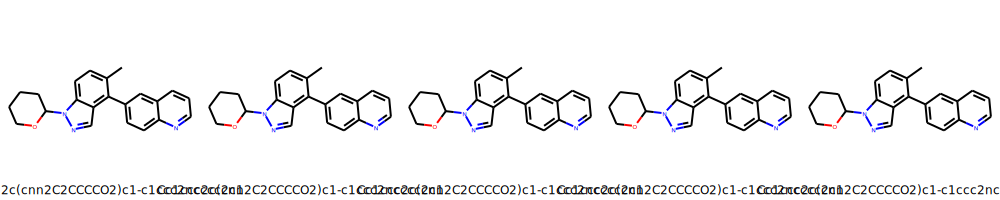

In [18]:
mols = df['mol'][:5]

#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df['Product'][:5].values))

In [19]:
df["Product_SMART"] = smiles_to_smart("Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1")

In [20]:
df.head()

,Reaction_No,Reactant_1_Name,Reactant_1_Short_Hand,Reactant_1_eq,Reactant_1_mmol,Reactant_2_Name,Reactant_2_eq,Catalyst_1_Short_Hand,...,Reactant_2_Name_SMART,Solvent_1_Short_Hand_SMART,Catalyst_1_Short_Hand_SMART,Reagent_1_Short_Hand_SMART,Ligand_Short_Hand_SMART,Product,mol,Product_SMART
0,1,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#5](-[#6]1:[#6]:[#6]2:[#6](:[#6]:[#6]:1-[#6])...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8H-].[Na+],[#6]-[#6](-[#6])(-[#6])-[#15](-[#6](-[#6])(-[#...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000002181A3...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...
1,2,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#5](-[#6]1:[#6]:[#6]2:[#6](:[#6]:[#6]:1-[#6])...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8H-].[Na+],[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#15](-[#6]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000002181A3...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...
2,3,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#5](-[#6]1:[#6]:[#6]2:[#6](:[#6]:[#6]:1-[#6])...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8H-].[Na+],[#15](-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#7]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000002181A3...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...
3,4,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#5](-[#6]1:[#6]:[#6]2:[#6](:[#6]:[#6]:1-[#6])...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8H-].[Na+],[#6]1-[#6]-[#6]-[#6](-[#6]-[#6]-1)-[#15](-[#6]...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000002181A3...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...
4,5,c1cc2cc(ccc2nc1)Cl,"1a, 6-Cl-Q",1,0.0004,B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O,1,CC(=O)[O-].CC(=O)[O-].[Pd+2],...,[#5](-[#6]1:[#6]:[#6]2:[#6](:[#6]:[#6]:1-[#6])...,[#6]-[#6]#[#7],[#6]-[#6](=[#8])-[#8-].[#6]-[#6](=[#8])-[#8-]....,[#8H-].[Na+],[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#15](-[...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,<rdkit.Chem.rdchem.Mol object at 0x000002181A3...,[#6]-[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:[#7]:[#7...


## Creat all chemical reaction SMILE

In [21]:
df["Ligand_Short_Hand"].fillna("", inplace=True)
df["Reagent_1_Short_Hand"].fillna("", inplace=True)

df["Chemical_react"] = df["Reactant_1_Name"].str.cat(df["Reactant_2_Name"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Solvent_1_Short_Hand"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Catalyst_1_Short_Hand"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Reagent_1_Short_Hand"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Ligand_Short_Hand"], sep='.')
df["Chemical_react"] = df["Chemical_react"].str.cat(df["Product"], sep='>>')


In [22]:
df["Chemical_react"][0]

'c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O.CC#N.CC(=O)[O-].CC(=O)[O-].[Pd+2].[OH-].[Na+].CC(C)(C)P(C(C)(C)C)C(C)(C)C>>Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1'

In [23]:
df["Chemical_react"][93]

'c1cc2cc(ccc2nc1)Cl.B(c1cc2c(cc1C)cnn2C3CCCCO3)(O)O.CC#N.CC(=O)[O-].CC(=O)[O-].[Pd+2]..c1ccc(cc1)P(c2ccccc2)C34C5[Fe]3678912(C5C6C74)C3C8C9C1(C23)P(c1ccccc1)c1ccccc1>>Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1'

## Fingerprint RXNFP one chemical reaction

Generate RXNBERT fingerprints from reaction SMILES

In [24]:
from rxnfp.transformer_fingerprints import (
    RXNBERTFingerprintGenerator, get_default_model_and_tokenizer, generate_fingerprints
)

model, tokenizer = get_default_model_and_tokenizer()

rxnfp_generator = RXNBERTFingerprintGenerator(model, tokenizer)

example_rxn = "CO.O.O=C(NC(=S)Nc1nc(-c2ccccc2)cs1)c1ccccc1.[Na+].[OH-]>>NC(=S)Nc1nc(-c2ccccc2)cs1"

fp = rxnfp_generator.convert(example_rxn)
print(len(fp))
print(fp[:5])

256
[0.9104991555213928, -2.5920534133911133, -2.231126070022583, -1.4040558338165283, -0.7854806184768677]


In [25]:
fp[0]

0.9104991555213928

## Fingerprint RXNFP all chemical reaction

In [26]:
rxns = df["Chemical_react"]
fps = rxnfp_generator.convert_batch(rxns)
print(len(fps), len(fps[0]))

5760 256


In [27]:
X = fps

In [28]:
len(X)

5760

In [29]:
X = np.asarray(X, dtype=np.float32)

array([[-0.9271826 , -0.5543691 , -0.25948697, ...,  1.9661086 ,
        -0.2346875 , -1.3231049 ],
       [-0.877067  , -0.6061853 , -0.26496735, ...,  2.0238762 ,
        -0.29297343, -1.3545521 ],
       [-0.97473466, -0.8937602 , -0.253949  , ...,  2.1728961 ,
        -0.40940624, -1.578342  ],
       ...,
       [-0.6722745 ,  1.1141175 ,  0.20490773, ...,  2.2096615 ,
        -2.1572213 , -1.1233355 ],
       [-0.59030455,  1.0635871 ,  0.11578147, ...,  2.0003061 ,
        -1.96136   , -1.1467954 ],
       [-0.7089296 ,  0.95577383,  0.05281088, ...,  2.0118008 ,
        -1.9419001 , -1.0729669 ]], dtype=float32)

In [30]:
X.shape

(5760, 256)

In [31]:
y = df["Product_Yield_PCT_Area_UV"]
y = y.apply(lambda x: x/100)

In [32]:
df = pd.DataFrame(X)

In [33]:
df.to_csv("finger.csv", index=False)

In [34]:
sub = list(tokenizer.get(248))[0].replace("c", "C")

AttributeError: 'SmilesTokenizer' object has no attribute 'get'